## Week three - Ridge Regression - Gradient Descent

<p>First, import necessary libraries.</p>

In [115]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [116]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [117]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

### Create a function to return numpy data from a dataframe

In [118]:
def get_numpy_data(data_frame, features, output):
    data_frame['constant'] = 1 # add a constant column to a dataframe
    # prepend variable 'constant' to the features list
    features = ['constant'] + features
    # select the columns of data_frame given by the ‘features’ list into the Frame ‘features_frame’
    features_frame = data_frame[list(features)]
    # this will convert the features_sframe into a numpy matrix
    features_matrix = features_frame.as_matrix()
    # assign the column of data_frame associated with the target to the variable ‘output_array’
    output_column = data_frame[output]
    # this will convert the series into a numpy array:
    output_array = output_column.as_matrix()
    return(features_matrix, output_array)

In [119]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [120]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    derivatives = 2*(errors * feature)
    penalty = 0
    if not feature_is_constant:
        penalty = 2 *  (weight * l2_penalty)
    derivative = np.sum(derivatives) + penalty
    return derivative

### Now test the feature derivation using the supplied code

In [121]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0


In [122]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0
    #while not reached maximum number of iterations:
    while iteration < max_iterations:
        # compute the predictions using your predict_output() function
        prediction = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = prediction - output
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False)
            # subtract the step size times the derivative from the current weight  
            weights[i] = weights[i] - (step_size * derivative)
            iteration = iteration + 1
    return weights

In [123]:
training_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(training_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

### First set all parameters to initial values

In [124]:
l2_penalty = 0.0
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(2)

In [125]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [126]:
l2_penalty = 1e11
simple_weights_large_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

### Plot both models against the true data. No penalty in blue; large penalty in red.

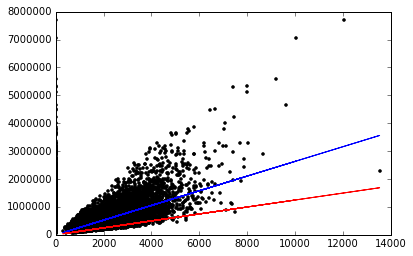

In [127]:
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_large_penalty),'r-')

### Calculate RSS for each model.

In [128]:
rss_0 = sum((predict_output(simple_test_feature_matrix, np.zeros(2)) - test_output) ** 2)
rss_low_penalty = sum((predict_output(simple_test_feature_matrix, simple_weights_0_penalty) - test_output) ** 2)
rss_high_penalty = sum((predict_output(simple_test_feature_matrix, simple_weights_large_penalty) - test_output) ** 2)

In [129]:
print 'For zero weights: ' + str(rss_0)
print 'For no L2 penalty: ' + str(rss_low_penalty)
print 'For large L2 penalty: ' + str(rss_high_penalty)

For zero weights: 1.78427328614e+15
For no L2 penalty: 2.75723637336e+14
For large L2 penalty: 6.94648206398e+14


### Let's test on a multi-feature input

In [130]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(training_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

### Set the initial values

In [131]:
l2_penalty = 0.0
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(3)

In [132]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [133]:
l2_penalty = 1e11
multiple_weights_large_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

### Calculate RSS for each model.

In [134]:
rss_0 = sum((predict_output(test_feature_matrix, np.zeros(3)) - test_output) ** 2)
rss_low_penalty = sum((predict_output(test_feature_matrix, multiple_weights_0_penalty) - test_output) ** 2)
rss_high_penalty = sum((predict_output(test_feature_matrix, multiple_weights_large_penalty) - test_output) ** 2)

In [135]:
print 'For zero weights: ' + str(rss_0)
print 'For no L2 penalty: ' + str(rss_low_penalty)
print 'For large L2 penalty: ' + str(rss_high_penalty)

For zero weights: 1.78427328614e+15
For no L2 penalty: 2.73684264524e+14
For large L2 penalty: 5.00407279071e+14


### Predict the price of the first house for no and large penalties.

In [140]:
print 'No penalty: ' + str(predict_output(test_feature_matrix[0], multiple_weights_0_penalty))
print 'Large penalty: ' + str(predict_output(test_feature_matrix[0], multiple_weights_large_penalty))

print 'True value: ' + str(test_output[0])

No penalty: 394271.344299
Large penalty: 270450.982944
True value: 310000.0
